EE 502 P: Analytical Methods
# 5. Differential Equations
## Prof. Eric Klavins, Electrical and Computer Engineering
### 25 September, 2019
Copyright &copy; 2019, University of Washington

# Outline

- First Examples
  - x' = ax
  - x' = ax(1-x)
- Two Equations
  - State space
  - Example: Van der Pol Oscillator
  - Phase portraits
  - Numerical Solutions
- Linear Systems
  - Linearization
  - Stability analysis of equilibria
  - All planar linear systems
  - Solutions to linear ODEs
- Nonlinear systems generally
  - Definition 
  - Examples
  - Existence and uniqueness: statement
  - Examples of Picard iteration
  - Continuous dependence on initial condition and parameters
- Chaos

In [234]:
import math
import scipy # Has linear algebra
import scipy.ndimage
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline

# First Examples

## 1D Linear Differential Equation

One of the most basic differential equations is

$$
\frac{d}{dt}x = a x,
$$

where $x = x(t)$ is a function of $t$ (usually considered to be time) and $a \in \mathbb{R}$ is a constant parameter. In this course, we use a dot over a variable to represent $\frac{d}{dt}$ so that the above becomes

$$
\dot x = a x.
$$

A solution to this equation is

$$
x(t) = k e^{at}
$$

where $k \in \mathbb{R}$ is a constant. This is because if we plug this value for $x$ into the differential equation we get equality:

$$
\dot x = \frac{d}{dt}(x(t)) = \frac{d}{dt}(k e^{at}) = k a e^{at} = a x(t).
$$

If $x(0) = x_0$, then we can see that $k$ corresponds to the initial condition since

$$
x(0) = k e^{a \cdot 0} = k.
$$

So we can write 

$$
x(t) = e^{at}x(0).
$$



In [48]:
# Solution to a simple ODE

x,a,t = sm.symbols("x,a,t")
eqn = sm.diff(x(t), t) - sm.sin(t) * a * x(t)
sm.dsolve(eqn, x(t))

           -a⋅cos(t)
x(t) = C₁⋅ℯ         

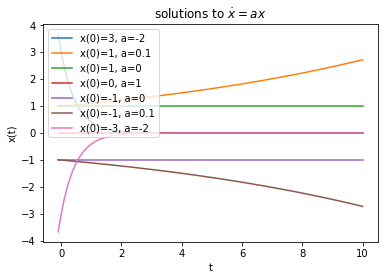

In [49]:
# Example solutions to x'=ax

t = np.linspace(-0.1,10,100);
plt.plot(t, 3*np.exp(-2*t), label="x(0)=3, a=-2")
plt.plot(t, 1*np.exp(0.1*t), label="x(0)=1, a=0.1")
plt.plot(t, 1*np.exp(0.0*t), label="x(0)=1, a=0")
plt.plot(t, 0*np.exp(1*t), label="x(0)=0, a=1")
plt.plot(t, -1*np.exp(0.0*t), label="x(0)=-1, a=0")
plt.plot(t, -1*np.exp(0.1*t), label="x(0)=-1, a=0.1")
plt.plot(t, -3*np.exp(-2*t), label="x(0)=-3, a=-2")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("solutions to $\dot x=ax$")
plt.legend();

## Linearity

**Def:** Let $f : \mathbb{R} \rightarrow \mathbb{R}$. Then $f$ is linear if for all real $p$ and $q$:

$$
f(px+qy) = p f(x) + q f(y)
$$

**Note:** The differential equation $\dot x = ax$ is linear. In this case, this is because the map $f(x) = ax$ is linear, as can be seen:

\begin{eqnarray}
f(px+qy) & = & a(px+qy) \\
         & = & pax + qay \\
         & = & pf(x) + qf(y).
\end{eqnarray}

## Non-autonomous

The equation $\dot x = ax$ is called **autonomous** because the function $f(x,t) = ax$ does not depend on time. An example of a **non-autonomous** but still linear function is

$$
\dot x = \sin(t) a x .
$$

This system is still linear since

\begin{eqnarray}
f(px+qy) & = & \sin(t)a(px+qy) \\
         & = & p\sin(t)ax + q\sin(t)ay \\
         & = & pf(x) + qf(y).
\end{eqnarray}

In [76]:
# Solution to a non-autonomous ODE
x,a,t = sm.symbols("x,a,t")
eqn = sm.diff(x(t), t) - sm.sin(t) * a * x(t)
sm.dsolve(eqn, x(t))

           -a⋅cos(t)
x(t) = C₁⋅ℯ         

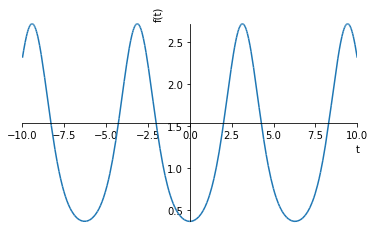

In [66]:
sm.plot(sm.exp(-sm.cos(t)));

In [40]:
?sm.dsolve

## A 1D Nonlinear Differential Equation

Now suppose that 

$$
\dot x = ax(1-x)
$$

This equation nonlinear. This is because if $f(x) = ax(1-x)$, then

$$
f(1+1) = 0 \neq -2a =  f(2).
$$

We can still find a solution, however.

In [90]:
# Solution to a non-autonomous ODE
x,a,t = sm.symbols("x,a,t")
eqn = sm.diff(x(t), t) - a * x(t) * ( 1 - x(t))
sol = sm.dsolve(eqn, x(t))
sol = sm.simplify(sol)
sol

           a⋅t  
         -ℯ     
x(t) = ─────────
             a⋅t
       C₁ - ℯ   

In [99]:
# Note that dsolve returns an Eq object. To get the expression for the solution, you do

sol.args[1]

    a⋅t  
  -ℯ     
─────────
      a⋅t
C₁ - ℯ   

In [101]:
# Now we can see the relationship between the initial condition and the constant C1

x0,C1 = sm.symbols("x0, C1")
init = sm.solve(sol.args[1].subs(t,0)-x0,C1)

In [107]:
# Now we can get an expression for the solution in terms of the initial condition

X = sm.simplify(sol.args[1].subs(C1,init[0]))
X

        a⋅t     
    x₀⋅ℯ        
────────────────
    a⋅t         
x₀⋅ℯ    - x₀ + 1

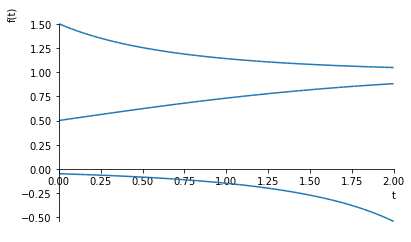

In [150]:
# And plot the resulting function

sm.plot(
    X.subs(a,1).subs(x0,1.5),
    X.subs(a,1).subs(x0,0.5),
    X.subs(a,1).subs(x0,-0.05),
    (t,0,2));

Qualitatively, this ODE has five different behaviors, depending on where it starts. Suppose that $a>0$. Then we have the following cases:

**Case 1:** $x_0 < 0$. In this case, 

$$
\dot x = ax(1-x) < 0 
$$

so the trajectories tend toward $- \infty$. 

**Case 2,3:** $x_0 = 0$ or $x_0 = 1$. In this case, $\dot x = 0$. We say these are **equilibrium points** of the ODE.

**Case 4:** $0 < x_0 < 1$. In this case,

$$
\dot x = ax(1-x) > 0
$$

and the solutions tend upward. However, they can't go beyond $1$, so the must tend toward 1. 

**Case 4:** $x_0 > 1$. In this case,

$$
\dot x = ax(1-x) < 0
$$

and the solutions tend downward. However, they can't go beyond $1$, so the must tend toward 1. 



## Not all ODEs have closed form solutions

Just a word of warning. Most differential equations do not have closed form, analytical solutions like the above do. Thus, in most cases, we need to analyze the equations differently, which is the main subject of differential equations.

# Systems of Two Equations

## The Van der Pol Oscillator

An example from electronics is the following circuit.

<img src="https://i.stack.imgur.com/WhHfJ.png" width=400px>

It can be modeled by the equation

$$
\ddot y - \mu(1-y^2)\dot y + y = 0,
$$

where the two dots mean taking two derivatives w.r.t. time. In this equation, $y$ is the current through the inductor, and $\mu$ is a constant depending the nonlinear element, and the capacitance and inductance are assumed to be 1.

This form of equation is not ideal for analysis, because it hides the fact that **two** things are changing, mainly $y$ and $\dot y$. If we define

\begin{eqnarray}
x_1 & = & y \\
x_2 & = & \dot y
\end{eqnarray}

then

\begin{eqnarray}
\dot x_1 & = & x_2
\end{eqnarray}

and
\begin{eqnarray}
\dot x_2 & = & \mu(1-y^2)\dot y - y \\
         & = & \mu(1-x_1^2) x_2 - x_1
\end{eqnarray}

leading to the **system** of two ODEs

\begin{eqnarray}
\dot x_1 & = & x_2 \\
\dot x_2 & = & \mu(1-x_1^2) x_2 - x_1 .
\end{eqnarray}


##  Representing a system of ODEs as a Python Function

In [256]:
def f_vdp(x,t):
    mu = 2
    return [
        x[1],
        mu*(1-x[0]**2)*x[1] - x[0]
    ]

f_vdp([2,3],t)

[3, -20]

## Vector Fields and Phase Portraits

A system of two ODEs defines a vector field. That is, for each $x_1$ and $x_2$ we define the vector $(\dot x_1, \dot x_2)$. The solutions then have to follow these vector fields. To do this kind of analysis of a system of ODEs, we first draw the vectors in the plane.

We can draw 2D system models by drawing vectors for a number of points in the plane. For example, with the pendulum we might grid theta into points from -2 &pi; to 2 &pi; and omega into points from -1 to 1. 

In Python, we can write the following to make a grid of values for which to evaluate the model. The `meshgrid` function from numpy helps with this. Here is a simple example of the use of `meshgrid`.

In [227]:
X,Y = np.meshgrid([-6.28,0,6.28],[-1,0,1])
print(X)
print("---")
print(Y)

[[-6.28  0.    6.28]
 [-6.28  0.    6.28]
 [-6.28  0.    6.28]]
---
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


We can determine the "shape" of a meshgrid component using the shape attribute:

In [228]:
X.shape

(3, 3)

Now by going through `X[i],Y[j]` for `i=0 to X.shape-1` and `j=0 to Y.shape -1` we get all pairs of coordinates on which to evaluate our dynamical system function.

To make a larger grid, we use `linspace`:

In [229]:
a1,b1 = (-2,2)
a2,b2 = (-4,4)
x1 = np.linspace(a1, b1, 19)
x2 = np.linspace(a2, b2, 19)
X1,X2 = np.meshgrid(x1,x2)

Next, we make a grid of vectors to store the resulting evaluations. We initialize it to zero at first using the `zeros` function from numpy, which returns a matrix of zeros according with a size corresponding to the arguments provided. In this case, we use the shapes of X and Y.

In [230]:
u,v = np.zeros(X1.shape), np.zeros(X2.shape)

Then we evaluate the model at each point in the grid, storing the resulting vectors in u,v:

In [231]:
n,m = X1.shape
for i in range(n):
  for j in range(m):
    xdot = f_vdp([X1[i,j],X2[i,j]],0)
    u[i,j] = xdot[0]
    v[i,j] = xdot[1]

Once we have all the vectors defined, we can use the `quiver` method to draw all of them on the $\theta-\omega$ plane.

(-4, 4)

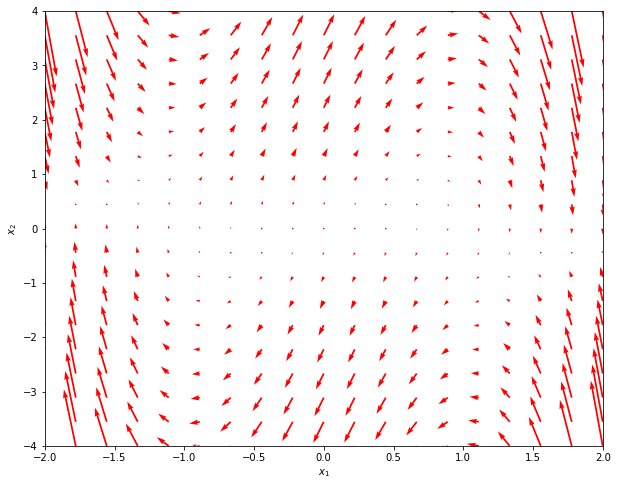

In [250]:
plt.rcParams['figure.figsize'] = [10,8]
Q = plt.quiver(X1, X2, u, v, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([a1,b1])
plt.ylim([a2,b2])

Note that the equilibrium points are readily seen. You can also see that some of them see to attract the arrows around them, and some seem to repel them.

## Numerical Solutions

You can now get a sense of what the solutions look like, although it is still a bit hard to see. To go further, we can **numerically** find a trajectory.

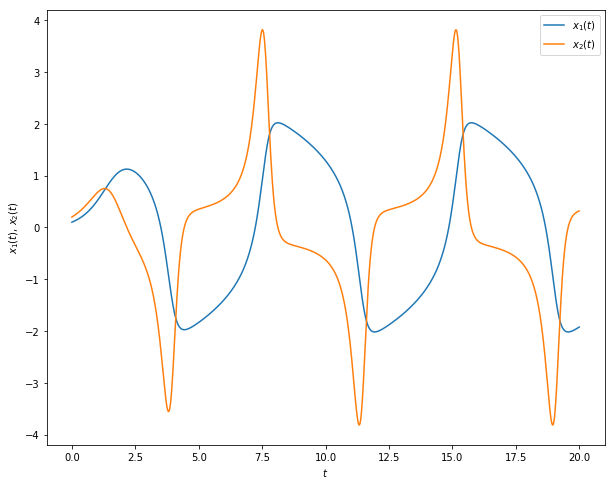

In [253]:
t = np.linspace(0., 20, 1001)
trajectory = spi.odeint(f_vdp,[0.1,0.2],t);
plt.plot(t, trajectory[0:,0],label="$x_1(t)$");
plt.plot(t, trajectory[0:,1],label="$x_2(t)$");
plt.xlabel('$t$');
plt.ylabel('$x_1(t)$, $x_2(t)$');
plt.legend();

We can also plot this trajectory in phase space on top of the phase portrait. You should see that the vectors are tangent to the trajectory.

(-4, 4)

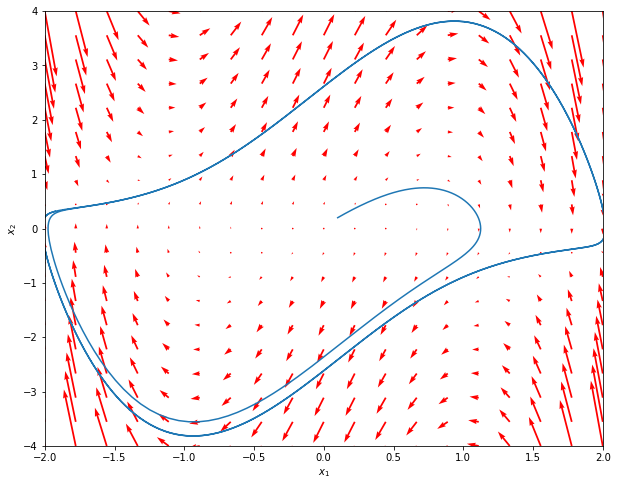

In [255]:
plt.rcParams['figure.figsize'] = [10,8]
Q = plt.quiver(X1, X2, u, v, color='r')
plt.plot(trajectory[0:,0], trajectory[0:,1]);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([a1,b1])
plt.ylim([a2,b2])

(-5, 5)

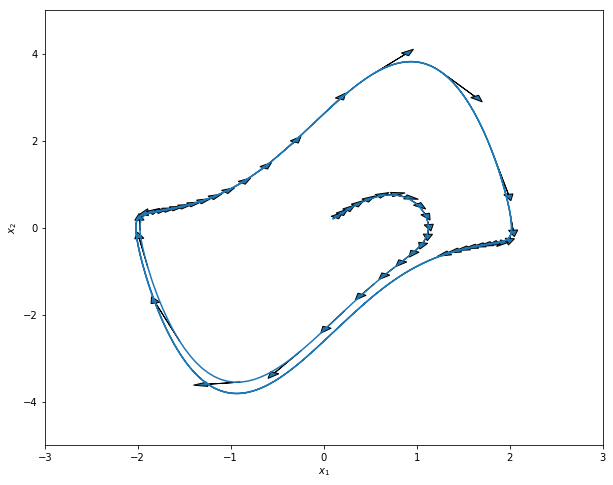

In [276]:
# Shown differently

for i in range(50):
    x = trajectory[10*i]
    y = 0.1*np.array(f_vdp(x,0))
    plt.arrow(x[0], x[1], y[0], y[1],head_width=0.1)
    
plt.plot(trajectory[0:,0], trajectory[0:,1]);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([a1-1,b1+1])
plt.ylim([a2-1,b2+1])

# Linearization

##  The Pendulum Model

**A Pendulum**: Another example is a pendulum with angle theta and angular velocity omega.![alt text](https://raw.githubusercontent.com/klavins/ECE447/master/images/pendlum.png)

The equations for the pendulum are:

> $\dot{\left (
\begin{array}{c} 
\theta \\ 
\omega
\end{array} \right )} = 
\left (
\begin{array}{c} 
\omega \\ 
\frac{g}{l}\sin(\theta)-b \omega
\end{array} \right )
$

To model this system in Python we write:

In [278]:
def f_pendulum(x,t):
  theta, omega = x;
  g = 9.81;
  m = 1;
  l = 10;
  b = 0.5;
  return [omega,g*np.sin(theta)/l-b*omega]

And here is a phase portrait

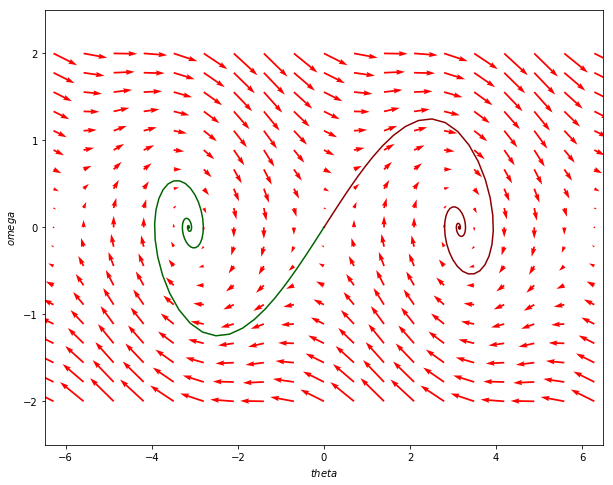

In [285]:
# Find numerical solutions
t = np.linspace(0., 30, 120)
x1 = spi.odeint(f_pendulum,[0.01,0],t);
x2 = spi.odeint(f_pendulum,[-0.01,0],t);

# Plot them
plt.rcParams['figure.figsize'] = [10,8]
plt.plot(x1[:,0],x1[:,1],label="trajectory 1", color='darkred');
plt.plot(x2[:,0],x2[:,1],label="trajectory 2", color='darkgreen');

# Make a vector field plot
theta = np.linspace(-2.0 * math.pi, 2.0 * math.pi, 19)
omega = np.linspace(-2, 2, 19)
Theta,Omega = np.meshgrid(theta,omega)
u,v = np.zeros(Theta.shape), np.zeros(Omega.shape)
n,m = Theta.shape
for i in range(n):
  for j in range(m):
    xdot = f_pendulum([Theta[i,j],Omega[i,j]],0)
    u[i,j] = xdot[0]
    v[i,j] = xdot[1]
    
# Plot it
Q = plt.quiver(Theta, Omega, u, v, color='r')

# Make it nice looking
plt.xlabel('$theta$')
plt.ylabel('$omega$')
plt.xlim([-2*math.pi-0.2, 2*math.pi+0.2])
plt.ylim([-2.5, 2.5]);

## Scalar Systems


Start with a nonlinear system

$$
\dot x = f(x)
$$

where $x$ is a scalar function of t. Using the [Taylor Series](https://en.wikipedia.org/wiki/Taylor_series) we can expand $f$ near zero as follows:

$$
f(x) \approx f(0) + f'(0)\;x + \mathit{H.O.T.}
$$

Here, $f'(0)$ is the *linear* part and *H.O.T.* stands for *higher order terms*, which we don't care about right now (because we are linearizing).

**Example**: Suppose $f(x) = \sin(x)$. Then $f(0)=0$ and 

$$
f'(0) = \cos(0) = 1
$$

Thus, 

$$
\sin(x) \approx 0 + x + \mathit{H.O.T.}
$$

We can visualize this with a plot.

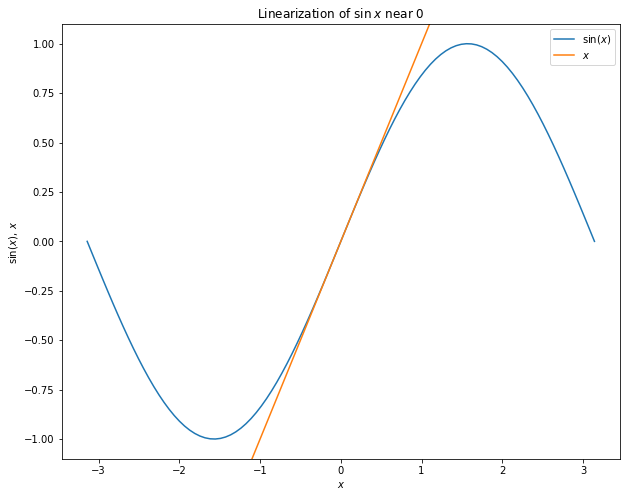

In [286]:
x = np.linspace(-np.pi,np.pi,100);
plt.plot(x,np.sin(x),label="$\sin(x)$")
plt.plot(x,x,label="$x$")
plt.xlabel('$x$')
plt.ylabel('$\sin(x), \; x$')
plt.title("Linearization of $\sin \; x$ near 0")
plt.ylim([-1.1, 1.1])
plt.legend();

## Vector Valued Systems

Now suppose that $x \in \mathbb{R}^n$ is a vector and $f$ is a vector valued function. Then,

$$
f(x) = 0 + \left.\frac{\partial f}{\partial x}\right|_{x=0} + \mathit{H.O.T.}
$$

where the partial derivative of $f$ is defined by:

$$
\frac{\partial f}{\partial x} = \left(
\begin{array}{ccc}
  \frac{\partial f_1}{\partial x_1} & \dots & \frac{\partial f_1}{\partial x_n} \\
  \vdots &  \; & \vdots \\
  \frac{\partial f_n}{\partial x_1} & \dots & \frac{\partial f_n}{\partial x_n} 
\end{array}
\right )
$$

Evaluating the partial derivative at $x=0$ gives us the *Jacobian* matrix, which is in control systems is usually evaluated a $A$.

**Example: The Pendulum**: Suppose $g/l = b = 1$ in the pendulum model. Then

$$
\dot{\left (
\begin{array}{c} 
\theta \\ 
\omega
\end{array} \right )} = 
\left (
\begin{array}{c} 
\omega \\ 
\sin\theta-\omega
\end{array} \right )
$$

describes the nonlinear dynamics. To linearize the system around $\theta = 0$ and $\omega = 0$, we do

$$
\frac{\partial f}{\partial x} = \left.\left(
\begin{array}{cc}
  \frac{\partial \omega}{\partial \theta} & 
  \frac{\partial \omega}{\partial \omega} \\
  \frac{\partial (\sin \theta - \omega )}{\partial \theta} &
  \frac{\partial (\sin \theta - \omega )}{\partial \omega} 
\end{array}
\right )\right|_{\theta=0,\omega=0}
=
\left.\left(
\begin{array}{cc}
  0 & 1 \\
  \cos\theta & -1
\end{array}
\right )\right|_{\theta=0,\omega=0}
=
\left(
\begin{array}{cc}
  0 & 1 \\
  1 & -1
\end{array}
\right)
$$

So, near $0$ the system looks like

$$
\left (
\begin{array}{c} 
\dot\theta \\ 
\dot\omega
\end{array} \right )
\approx
\left(
\begin{array}{cc}
  0 & 1 \\
  1 & -1
\end{array}
\right)
\left (
\begin{array}{c} 
\theta \\ 
\omega
\end{array} \right )
=
\left (
\begin{array}{c} 
\omega \\ 
\theta - \omega
\end{array} \right )
$$

We can visualize this vector field with `quiver`.

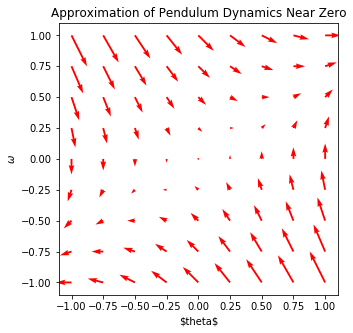

In [287]:
theta = np.linspace(-1, 1, 9)
omega = np.linspace(-1, 1, 9)
Theta,Omega = np.meshgrid(theta,omega)
u = Omega
v = Theta - Omega
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(Theta, Omega, u, v, color='r')
plt.xlabel('\\$theta$')
plt.ylabel('$\omega$')
plt.title("Approximation of Pendulum Dynamics Near Zero");

We will not show it mathematically, but is a beautiful theorem in mathematics that for any $\varepsilon$, there exists a $\delta$ such that if $|x| < \delta$ then the difference between $f$ and its linearization is less than $\varepsilon$. 

Said differently, the linearization approximates $f$ *locally*.

Changes of Coordinates
===

At other equilibrium points it is convenient to change coordinates, so that we are always examining the point zero. To do this:

- Say $x^*$ is an equilibrium point.
- Define $x_e = x - x^*$. 

Then,

$$
\dot x_e = \dot x = f(x) = f(x_e+x^*)
$$

So we now have an equation for the change of $x_e$ in terms of $x_e$ itself, and the constant $x^*$.

**Example**: For example, lets look at the behavior of the pendulum model at $(\theta,\omega) = (\pi,0)$. In this case, we linearize the function

$$
f \left (
\begin{array}{c} 
\theta_e + \pi \\ 
\omega_e + 0
\end{array} \right ) = 
\left (
\begin{array}{c} 
\omega_e \\ 
\sin(\theta_e+\pi)-\omega_e
\end{array} \right )
$$

The $A$ matrix is then

\begin{align}
\frac{\partial f}{\partial x} & = \left.\left(
\begin{array}{cc}
  \frac{\partial \omega_e}{\partial \theta_e} & 
  \frac{\partial \omega_e}{\partial \omega_e} \\
  \frac{\partial \sin (\theta_e+\pi) - \omega_e}{\partial \theta_e} &
  \frac{\partial \sin (\theta_e+\pi) - \omega_e}{\partial \omega_e} 
\end{array}
\right )\right|_{\theta_e=0,\omega_e=0} \\
& =
\left.\left(
\begin{array}{cc}
  0 & 1 \\
  \cos(\theta_e+\pi) & -1
\end{array}
\right )\right|_{\theta_e=0,\omega_e=0} \\
& =
\left(
\begin{array}{cc}
  0 & 1 \\
  -1 & -1
\end{array}
\right).
\end{align}

So, near $0$ *in the new coordinate system*, the system looks like

\begin{align}
\left (
\begin{array}{c} 
\dot\theta_e \\ 
\dot\omega_e
\end{array} \right )
& \approx
\left(
\begin{array}{cc}
  0 & 1 \\
  -1 & -1
\end{array}
\right)
\left (
\begin{array}{c} 
\theta_e \\ 
\omega_e
\end{array} \right ) \\
& =
\left (
\begin{array}{c} 
\omega_e \\ 
-\theta_e - \omega_e
\end{array} \right ).
\end{align}

We can visualize this vector field with `quiver` as well.

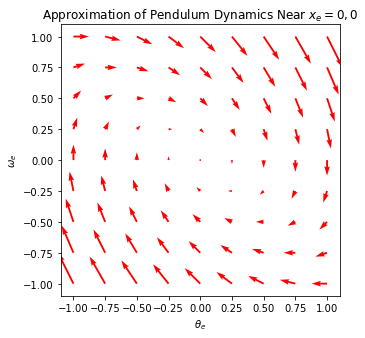

In [5]:
theta = np.linspace(-1, 1, 9)
omega = np.linspace(-1, 1, 9)
Theta,Omega = np.meshgrid(theta,omega)
u = Omega
v = -Theta - Omega
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(Theta, Omega, u, v, color='r')
plt.xlabel('$\\theta_e$')
plt.ylabel('$\omega_e$')
plt.title("Approximation of Pendulum Dynamics Near $x_e=0,0$");

Linear Systems and Eigenvalues
===

Note that once you linearize a system, you end up with $f(x) = Ax$ for some matrix $A \in \mathbb{R}^{n\times n}$. The dynamics of a linear system are thus

$$
\dot x = A x
$$

Here, we will try to characterize *everything* that could happen with two dimensional systems, that is, with $x \in \mathbb{R}^{2 \times 2}$. It turns out that the *eigenvalues* of $A$ tell us almost everything. 

**Example:** Recall that the eigenvalues of the system 
$$
A = \left(\begin{array}{cc}
0 & 1 \\
1 & -1
\end{array}\right)
$$

are 

$$
\lambda = \frac{-1\pm\sqrt{5}}{2}.
$$

or $-1.62$ and $0.62$. 

And the eigenvectors are

$$
A x = \lambda x
$$

In this case, we have

$$
{\bf x}_1 = \begin{pmatrix}1\\\frac{-1-\sqrt{5}}{2}\end{pmatrix} \approx 
\begin{pmatrix}1\\-1.62\end{pmatrix}
$$

and
 
$$
{\bf x}_2 = \begin{pmatrix}1\\\frac{-1+\sqrt{5}}{2}\end{pmatrix} \approx 
\begin{pmatrix}1\\0.62\end{pmatrix}.
$$

Knowing the *eigenstructure* of a system makes it easy to draw a cartoon of the phase vector field if the eigenvalues are real. This is because for an eigenvector x, $\dot x$ is just a scaled value of $x$: 

$$
\dot x = \lambda x.
$$

**Example:** Draw the vector field for $\dot x = A x$ when 
$$
A =\begin{pmatrix}0&1\\1&-1\end{pmatrix}.
$$

- First draw eigenvector subspaces. This means drawing $\lambda x$ where $x$ is an eigenvector for all $\lambda \in \mathbb{R}$. 
- Second, draw $\dot x$ on the subspaces.
- Fill in the rest.

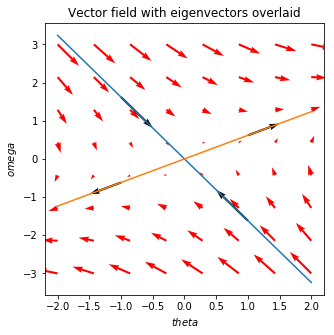

In [288]:
q=np.linspace(-2,2,10)
a=(-1-np.sqrt(5))/2
b=(-1+np.sqrt(5))/2

theta = np.linspace(-2, 2, 8)
omega = np.linspace(-3, 3, 8)
Theta,Omega = np.meshgrid(theta,omega)
u = Omega
v = Theta - Omega
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(Theta, Omega, u, v, color='r',angles='xy',scale_units='xy')

plt.plot(q,a*q)
plt.plot(q,b*q)
plt.quiver([1,-1,1,-1],[a,-a,b,-b],[-1,1,1,-1],[-a,a,b,-b],
           scale=2,angles='xy',scale_units='xy');

plt.xlabel('$theta$')
plt.ylabel('$omega$')
plt.title("Vector field with eigenvectors overlaid");

## Stability

Here you can see that if you start near (0,0) that you will bu pushed away, unless you are on the blue line (which is unlikely in a real system). So we call this equilibrium point **unstable**. More generally, stability is defined as follows:

**Def: ** A point $x_e$ is **asymptotically stable** if there exists $\epsilon > 0$ such that for all points $x$ with $||x - x_e|| < \epsilon$, $x(t) \rightarrow x_e$. 

Since all systems can be converted to Jordan form (the generalization of diagonal form we talked about last time), we should be able to look at every possible Jordan form and figure out all possible types of equilibria.

The Eigenvalues of Similar Matrices are Equal
---

If $A = PQP^{-1}$ and $\lambda$ is an eigenvalue of $A$, then for an eigenvector $x$ then

$$
Q P x = P A P^{-1} P x = P A x = P \lambda x = \lambda P x
$$

thus, $\lambda$ is also an eigenvalue of $Q$ with eigenvector $P x$. 

P is a Change of Coordinates
---

If $A = PQP^{-1}$ define $z = P^{-1}x$ then $x = P z$ and 

$$
\dot z = P^{-1}\dot x = P^{-1} A x = P^{-1} A P z = Q z
$$

Thus, the dynamics of $z$ are "similar" to the dynamics of $x$. And because they have the same eigenvalues, you can use either $A$ or $Q$ to understand the stability of either system.

$A$ is a squashed, rotated, and/or reflected version of $Q$
---

In [291]:
def plot_phase_portrait(matrices,titles):
    """Makes a plot of the phase portraits of the given matrices"""
    fig, ax = plt.subplots(1, len(matrices), figsize=(5*len(matrices)+1,5),squeeze=False)
    x1,x2 = np.meshgrid(np.linspace(-1, 1, 9),np.linspace(-1, 1, 9))
    for i,[matrix,title] in enumerate(zip(matrices,titles)):
        a = np.array(matrix).astype(np.float64)
        x1dot = a[0,0]*x1 + a[0,1]*x2
        x2dot = a[1,0]*x1 + a[1,1]*x2
        ax[0,i].quiver(x1, x2, x1dot, x2dot, color='r')
        ax[0,i].set_xlabel('$x_1$')
        ax[0,i].set_ylabel('$x_2$')
        ax[0,i].set_title(title)
    return None

⎡  1   √5          ⎤
⎢- ─ + ──     0    ⎥
⎢  2   2           ⎥
⎢                  ⎥
⎢            √5   1⎥
⎢   0      - ── - ─⎥
⎣            2    2⎦

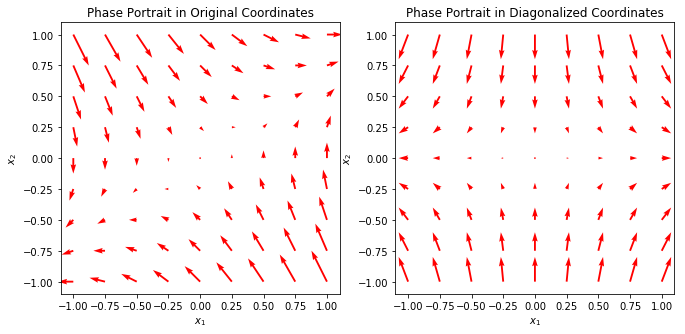

In [292]:
# Example matrix
A = sm.Matrix([[0, 1], [1,-1]])
P, Q = A.diagonalize()
plot_phase_portrait(
    [A,Q],
    [
        "Phase Portrait in Original Coordinates",
        "Phase Portrait in Diagonalized Coordinates"
    ])
Q


Real, Distinct Eigenvalues, Same Sign
===

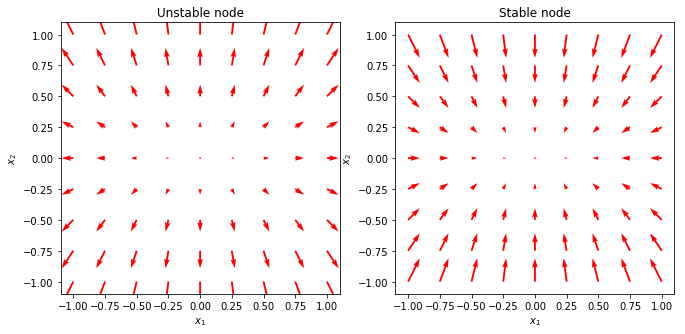

In [296]:
plot_phase_portrait(
    [
        sm.Matrix([[1,0],[0,2]]) ,
        sm.Matrix([[-1,0],[0,-2]])
    ],
    [
        "Unstable node",
        "Stable node"
    ])

Real, Opposite Signs
===

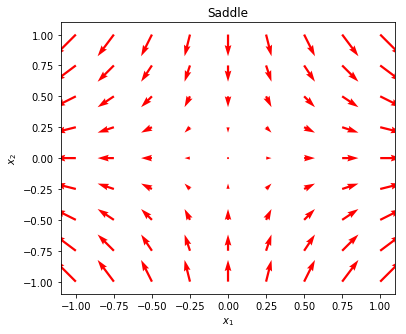

In [297]:
plot_phase_portrait(
    [
        sm.Matrix([[1,0],[0,-1]])
    ],
    [
        "Saddle"
    ])

Repeated Eigenvalues
===

Note that the canonical matrix for repeated eigenvalues has two cases. One is just

$$
A = \begin{pmatrix}
a & 0 \\
0 & a
\end{pmatrix}
$$

which looks a lot like the unrepeated case, and the other is 

$$
A = \begin{pmatrix}
a & 1 \\
0 & a
\end{pmatrix}
$$

Evaluating $|\lambda I - A|$ results in 

$$
\left|\begin{pmatrix}
\lambda - a & -1 \\
0 & \lambda - a
\end{pmatrix}\right| = (\lambda-a)^2
$$

which has roots $a$ and $a$. 

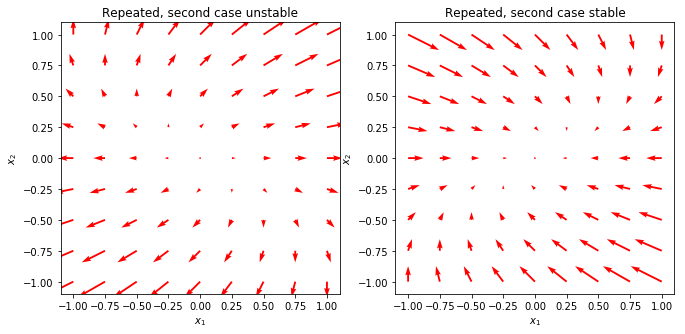

In [298]:
plot_phase_portrait(
    [
        sm.Matrix([[1,1],[0,1]]) ,
        sm.Matrix([[-1,1],[0,-1]])
    ],
    [
        "Repeated, second case unstable",
        "Repeated, second case stable"
    ])

One eigenvalue zero
===

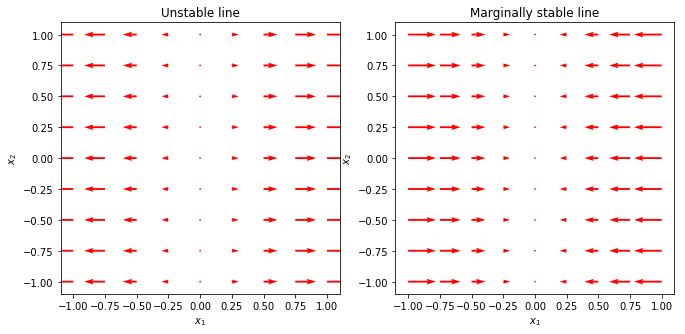

In [299]:
plot_phase_portrait(
    [
        sm.Matrix([[1,0],[0,0]]) ,
        sm.Matrix([[-1,0],[0,0]])
    ],
    [
        "Unstable line",
        "Marginally stable line"
    ])

Complex Eigenvalues
===

The canonical form for a matrix with complex conjugate eigenvalues is

$$
A = \begin{pmatrix}
a & b \\
-b & a
\end{pmatrix}
$$

Evaluating $|\lambda I - A|$ results in 

\begin{align}
\left|\begin{pmatrix}
\lambda - a & -b \\
b & \lambda + -a
\end{pmatrix}\right| & = (\lambda - a )^2 + b^2 \\
                     & = \lambda^2 - 2 a \lambda + a^2 + b^2
\end{align}

which has roots $a \pm b i$, as can be shown using sympy:

In [11]:
a = var("a",real=True)
b = var("b",real=True)
lam = var("lam")
solve(lam**2 - 2*a*lam + a**2 + b**2,lam)

[a - ⅈ⋅b, a + ⅈ⋅b]

Or better yet

In [13]:
lam1, lam2 = Matrix([[a,b],[-b,a]]).eigenvals()
lam1

a - ⅈ⋅b

To understand what these matrices do, you can use polar coordinates. Set

$$
r = \sqrt{x_1^2 + x_2^2} \\
\theta = \arctan(x_1,x_2)
$$

then 

$$
r^2 = x_1^2 + x_2^2
$$

and 

$$
2 r \dot r = 2 x_1 \dot x_1 + 2 x_2 \dot x_2
$$

However, since $\dot x_1 = ax_1 + bx_2$ and $\dot x_2 = -bx_1 + ax_2$, we get (after canceling the 2):

\begin{align}
r \dot r & = x_1 (ax_1 + bx_2) + x_2 (-bx_1 + ax_2) \\
\; & = a x_1^2 + a x_2^2 = a r^2
\end{align}

and thus

$$
\dot r = a r
$$

Also, 

$$
\tan \theta = \frac{x_2}{x_1}
$$

so

$$
\dot\theta\sec^2\theta  = \frac{x_1 \dot x_2 - \dot x_1x_2}{x_1^2}
$$

Substituting in again gives

\begin{align}
\dot\theta\sec^2\theta & = \frac{x_1 (-bx_1 + ax_2) - (ax_1 + bx_2)x_2}{x_1^2} \\
\; & = - b \frac{x_1^2+x_2^2}{x_1^2}
\end{align}

which means (using the fact that sec is hypotenus over adjacent) that

$$
\dot \theta = -b
$$

Thus, we can see that as long as $a<0$, then the system will spiral inwards. If $a=1$ then you get endless circles at the same radius. And if $a>0$ you get unstable spirals outwards. Furthermore, $b$ indicates the direction of the spiral.

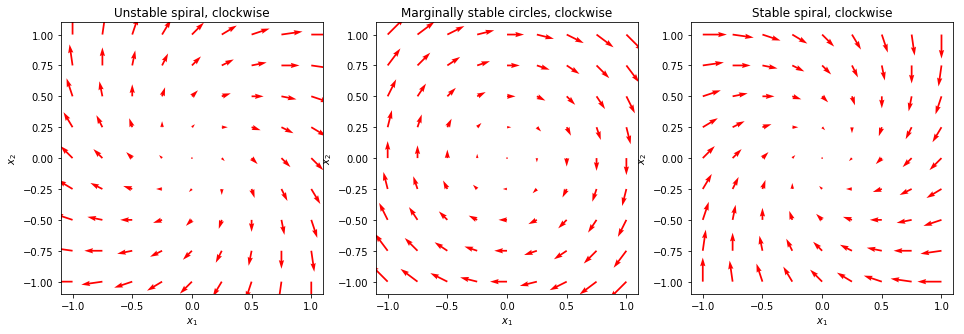

In [300]:
plot_phase_portrait(
    [
        sm.Matrix([[1,1],[-1,1]]),
        sm.Matrix([[0,1],[-1,0]]),
        sm.Matrix([[-1,1],[-1,-1]])
    ],
    [
        "Unstable spiral, clockwise",
        "Marginally stable circles, clockwise",
        "Stable spiral, clockwise",
    ])

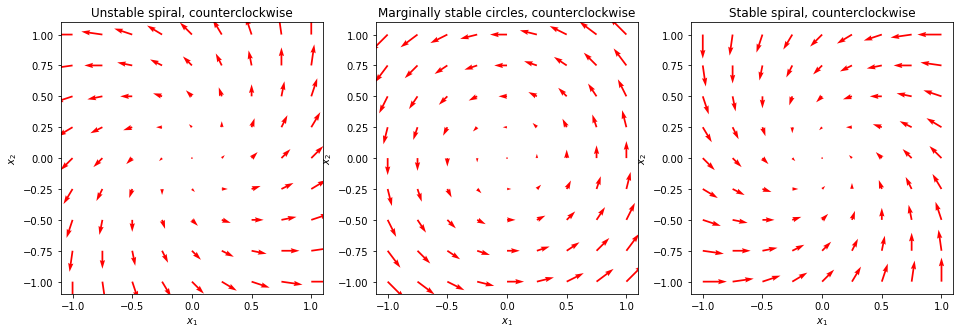

In [301]:
plot_phase_portrait(
    [
        sm.Matrix([[1,-1],[1,1]]),
        sm.Matrix([[0,-1],[1,0]]),
        sm.Matrix([[-1,-1],[1,-1]])
    ],
    [
        "Unstable spiral, counterclockwise",
        "Marginally stable circles, counterclockwise",
        "Stable spiral, counterclockwise",
    ])

An example
===

Suppose that 

\begin{align}
\dot x_1 & = x_2 \\
\dot x_2 & = (x_1-1)(x_1+1) - x_2
\end{align}

The equalibirum points are

\begin{align}
x_2 & = 0 \\
x_1 & = \pm 1.
\end{align}

Next we figure out what kind of linear system approximates the dynamics around each point. The Jacobian is

\begin{align}
J & = \begin{pmatrix}
\frac{\partial x_2}{\partial x_1} & 
\frac{\partial x_2}{\partial x_2} \\
\frac{\partial (x_1-1)(x_1+1) - x_2}{\partial x_1} & 
\frac{\partial (x_1-1)(x_1+1) - x_2}{\partial x_2} \\
\end{pmatrix} \\
\; & = \begin{pmatrix}
0 & 1 \\
2 x_1 & -1
\end{pmatrix}.
\end{align}

At $-1,0$ we get

$$
A = \begin{pmatrix}
0 & 1 \\
-2 & -1
\end{pmatrix} 
$$

which has eigenvalues

In [303]:
sm.Matrix([
    [0,1],
    [-2,1]
]).eigenvals()

⎧1   √7⋅ⅈ     1   √7⋅ⅈ   ⎫
⎨─ - ────: 1, ─ + ────: 1⎬
⎩2    2       2    2     ⎭

Thus, the point $(-1,0)$ is an unstable spiral. 

On the other hand, at $1,0$ we get

$$
A = \begin{pmatrix}
0 & 1 \\
2 & -1
\end{pmatrix} 
$$

which has eigenvalues 

In [304]:
sm.Matrix([
    [0,1],
    [2,1]
]).eigenvals()

{-1: 1, 2: 1}

which is a saddle point. We can find the eigenvectors to locate the axes of the saddle.

In [306]:
P,D = sm.Matrix([
    [0,1],
    [2,1]
]).diagonalize()
P

⎡-1  1⎤
⎢     ⎥
⎣1   2⎦

So the stable axis is the line $x_{e,2} = x_{e,1}$ and the unstable axis is $2x_{e,2} = x_{e,1}$. We can use this information to draw a complete picture.

<img src="https://raw.githubusercontent.com/klavins/ECE447/master/images/nonlinear-phase-portrait.png" width=50%>

Plotting with quiver supports our view.

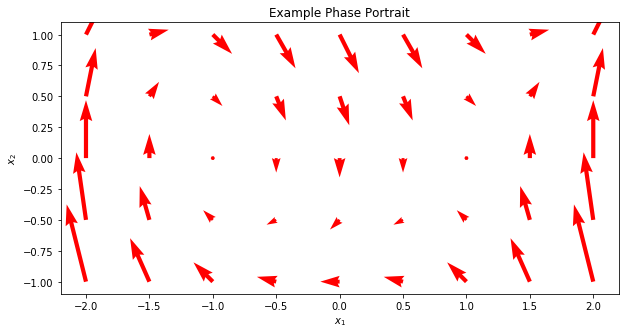

In [307]:
x1,x2 = np.meshgrid(np.linspace(-2, 2, 9),np.linspace(-1, 1, 5))
x1dot = x2
x2dot = (x1-1)*(x1+1)-x2
plt.rcParams['figure.figsize'] = [10,5]
plt.quiver(x1, x2, x1dot, x2dot, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Example Phase Portrait");

# Solutions to Linear ODEs

## The General Solution to $\dot x = Ax$

When $A \in \mathbb{R}^{n\times n}$, then the we define $e^{At}$ by

$$
e^{At} \triangleq I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \dots
$$

It turns out that 

$$
x(t) = e^{At}x(0)
$$

is the solution to $\dot x = Ax$. This is because

\begin{align}
\frac{d}{dt}e^{At}x(0) & = 
\frac{d}{dt}\left(I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \dots\right)x(0) \\
 & = \left(0 + A + A^2 t + \frac{A^3t^2}{2!} + \dots\right)x(0) \\
 & = A \left(I + At + + \frac{(At)^2}{2!} + \dots \right)x(0) \\
 &= A e^{At} x(0) \\
 & = A x(t).
\end{align}

We next explore what $e^{At}$ looks like for various types of matrices.

## Diagonalizable Matrices

If $A$ is diagonalizable, then $A = P D P^{-1}$ for some $P$ and $D$. In this case,

\begin{align}
e^{At} & = e^{PDP^{-1}t} \\
       & = I + PDP^{-1}t + \frac{(PDP^{-1}t)^2}{2!} + \dots \\
       & = I + PDP^{-1}t + \frac{PDP^{-1}PDP^{-1}t^2}{2!} + \dots \\
       & = I + PDP^{-1}t + \frac{PD^2P^{-1}t^2}{2!} + \dots \\
       & = P \left(I + Dt + \frac{D^2t^2}{2!} + \dots \right)P^{-1} \\
       & = P e^{Dt} P^{-1}.
\end{align}

Now, since $D$ is diagonal and of the form

$$
D = \begin{pmatrix}
\lambda_1 & 0 \\
0 & \lambda_2
\end{pmatrix}
$$

it is clear that 

$$
e^{Dt} = \begin{pmatrix}
e^{\lambda_1t} & 0 \\
0 & e^{\lambda_2t}
\end{pmatrix} .
$$

Thus, figuring out $e^{At}$ is just matrix multiplication using $P e^{Dt} P^{-1}$.

<span style="color: darkorange; border: 1pt solid darkorange; padding: 8px">
**NOTE**: In general, $e^{At}$ is **not** just the elementwise exponentials of the entries of $A$. 
</span>

More generally, you need to figure out $e^{Jt}$ where $J$ is the Jordan canonical form of the matrix.

Example: Real Eigenvalues
---

In [329]:
# Compute e^{At} using diagonalization method
sm.var("t")
A = sm.Matrix([
    [-2,-2],
    [-1,-3]
])
P,D = A.diagonalize()
sm.pprint(D)
eDt = sm.Matrix([
    [sm.exp(D[0,0]*t), 0], 
    [0, sm.exp(D[1,1]*t)]
])
eAt = P*eDt*P.inv()
eAt.simplify()
eAt

⎡-4  0 ⎤
⎢      ⎥
⎣0   -1⎦


⎡⎛   3⋅t    ⎞  -4⋅t  ⎛     3⋅t    ⎞  -4⋅t⎤
⎢⎝2⋅ℯ    + 1⎠⋅ℯ      ⎝- 2⋅ℯ    + 2⎠⋅ℯ    ⎥
⎢──────────────────  ────────────────────⎥
⎢        3                    3          ⎥
⎢                                        ⎥
⎢⎛   3⋅t    ⎞  -4⋅t    ⎛ 3⋅t    ⎞  -4⋅t  ⎥
⎢⎝- ℯ    + 1⎠⋅ℯ        ⎝ℯ    + 2⎠⋅ℯ      ⎥
⎢──────────────────    ────────────────  ⎥
⎣        3                    3          ⎦

In [313]:
# Compute e^{At} using sympy's exp which, works on 
# matrices and probably does the same thing
w = sm.exp(A*t)
w

⎡   -t    -4⋅t       -t      -4⋅t⎤
⎢2⋅ℯ     ℯ        2⋅ℯ     2⋅ℯ    ⎥
⎢───── + ─────  - ───── + ───────⎥
⎢  3       3        3        3   ⎥
⎢                                ⎥
⎢   -t    -4⋅t     -t      -4⋅t  ⎥
⎢  ℯ     ℯ        ℯ     2⋅ℯ      ⎥
⎢- ─── + ─────    ─── + ───────  ⎥
⎣   3      3       3       3     ⎦

In [314]:
# Find the solution to x' = Ax when x(0) = (1,-2)
sm.var("x10 x20")
x = eAt*sm.Matrix([x10,x20])
x.simplify()
x

⎡⎛    ⎛   3⋅t    ⎞         ⎛ 3⋅t    ⎞⎞  -4⋅t⎤
⎢⎝x₁₀⋅⎝2⋅ℯ    + 1⎠ - 2⋅x₂₀⋅⎝ℯ    - 1⎠⎠⋅ℯ    ⎥
⎢───────────────────────────────────────────⎥
⎢                     3                     ⎥
⎢                                           ⎥
⎢ ⎛      ⎛ 3⋅t    ⎞       ⎛ 3⋅t    ⎞⎞  -4⋅t ⎥
⎢ ⎝- x₁₀⋅⎝ℯ    - 1⎠ + x₂₀⋅⎝ℯ    + 2⎠⎠⋅ℯ     ⎥
⎢ ───────────────────────────────────────── ⎥
⎣                     3                     ⎦

In [316]:
# Find the solution to x' = Ax when x(0) = (1,-2)
x = eAt*sm.Matrix([1,-2])
x.simplify()
x

⎡     -t    -4⋅t  ⎤
⎢  2⋅ℯ   - ℯ      ⎥
⎢                 ⎥
⎢ ⎛ 3⋅t    ⎞  -4⋅t⎥
⎣-⎝ℯ    + 1⎠⋅ℯ    ⎦

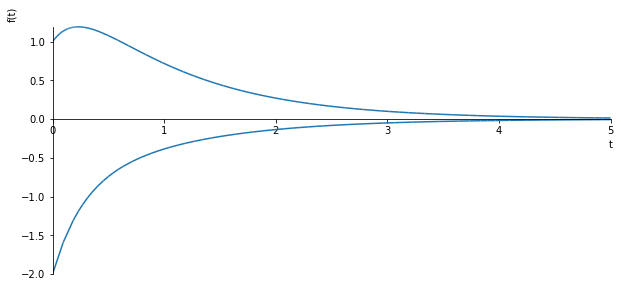

In [318]:
# Note, we are using sympy's plotting.plot method, and not numpy's method
sm.plot(x[0],x[1],(t,0,5));

Sympy's symbols cannot be used with numpy.plt directly. First, you have to convert them into functions. To do this, you use `lambdify`. For example, to turn the expression $e^{-t}$ into a function that numpy can use, you do

In [320]:
f = sm.lambdify(t,sm.exp(-t), modules=['numpy'])

You can now evaluate f for any t. For example:

In [321]:
print(f(0))
print(f(1))
print(f(2))

1.0
0.36787944117144233
0.1353352832366127


So, to plot the above solution to $\dot x = Ax$, we can do the following:

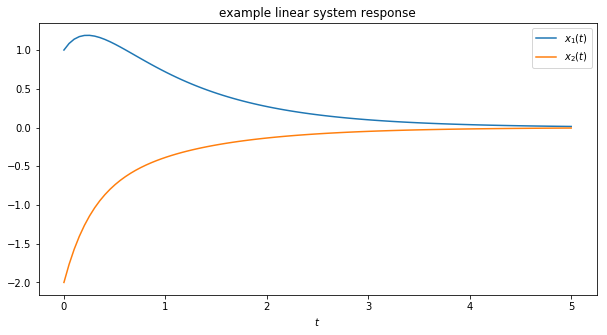

In [322]:
# Using numpy. 

# First, turn xt into functions
x = sm.lambdify(t,x, modules=['numpy'])

# then plot
tvals = np.linspace(0,5,100)
plt.plot(tvals,x(tvals)[0,0], label="$x_1(t)$")
plt.plot(tvals,x(tvals)[1,0], label="$x_2(t)$")
plt.xlabel("$t$")
plt.title("example linear system response")
plt.legend();

Example: Imaginary Eigenvalues
---
As another example, consider a matrix with complex eigenvalues. This can be diagonalized, you just don't get a real matrix. 

In [323]:
A = sm.Matrix([[-1,1],[-1,-1]])
P,D = A.diagonalize()
D

⎡-1 - ⅈ    0   ⎤
⎢              ⎥
⎣  0     -1 + ⅈ⎦

In [324]:
P

⎡ⅈ  -ⅈ⎤
⎢     ⎥
⎣1  1 ⎦

In [325]:
eAt=P*sm.exp(D*t)*P.inv()
eAt

⎡    t⋅(-1 - ⅈ)    t⋅(-1 + ⅈ)        t⋅(-1 - ⅈ)      t⋅(-1 + ⅈ)⎤
⎢   ℯ             ℯ               ⅈ⋅ℯ             ⅈ⋅ℯ          ⎥
⎢   ─────────── + ───────────     ───────────── - ─────────────⎥
⎢        2             2                2               2      ⎥
⎢                                                              ⎥
⎢     t⋅(-1 - ⅈ)      t⋅(-1 + ⅈ)     t⋅(-1 - ⅈ)    t⋅(-1 + ⅈ)  ⎥
⎢  ⅈ⋅ℯ             ⅈ⋅ℯ              ℯ             ℯ            ⎥
⎢- ───────────── + ─────────────    ─────────── + ───────────  ⎥
⎣        2               2               2             2       ⎦

In [326]:
eAt = eAt.simplify() # Uses cos(t) = (e^{it} + e^{-it})/2
eAt

⎡ -t           -t       ⎤
⎢ℯ  ⋅cos(t)   ℯ  ⋅sin(t)⎥
⎢                       ⎥
⎢  -t          -t       ⎥
⎣-ℯ  ⋅sin(t)  ℯ  ⋅cos(t)⎦

In [327]:
x = eAt*sm.Matrix([1,-2]) # e^{At} * (initial condition)
x.simplify()

⎡                      -t⎤
⎢(-2⋅sin(t) + cos(t))⋅ℯ  ⎥
⎢                        ⎥
⎢                      -t⎥
⎣-(sin(t) + 2⋅cos(t))⋅ℯ  ⎦

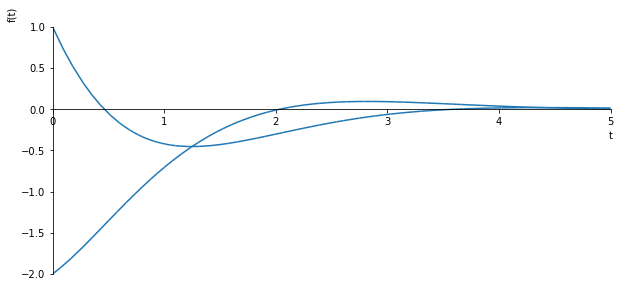

In [328]:
sm.plot(x[0],x[1],(t,0,5));